In [30]:
import pandas as pd
import numpy as np
df_transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions',skiprows=[0])
df_new_customer_list = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='NewCustomerList',skiprows=[0])
df_customer_demographics = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',skiprows=[0], parse_dates= [5])
df_customer_address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 'CustomerAddress',skiprows=[0])

In [12]:
df_customer_demographics['gender'].replace({'F':'Female','Femal':'Female','M':'Male','U':np.nan},inplace=True)
df_customer_demographics['gender'].unique()
df_customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               3912 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [31]:
df_customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [13]:
df_customer_demographics.drop(['deceased_indicator'],axis=1,inplace=True)

In [14]:

# df_customer_demographics['DOB'] = pd.to_datetime(df_customer_demographics['DOB'])

In [15]:


df_customer_demographics['job_industry_category'].value_counts()



job_industry_category
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

In [28]:
pd.to_datetime(pd.Timestamp('now').year)

Timestamp('1970-01-01 00:00:00.000002023')

In [27]:
def calcAge(DOB):
    return DOB - pd.to_datetime(pd.Timestamp('now').year)

df_customer_demographics = df_customer_demographics[df_customer_demographics].apply(calcAge)

ValueError: Boolean array expected for the condition, not int64

In [25]:
now = pd.Timestamp('now')

df_customer_demographics['DOB'] = pd.to_datetime(df_customer_demographics['DOB'], format='ISO8601' )    # 1
df_customer_demographics['DOB'] = pd.to_datetime(df_customer_demographics['DOB'], format='%Y')    # 1
df_customer_demographics['DOB'] = df_customer_demographics['DOB'].where(df_customer_demographics['DOB'] < now, df_customer_demographics['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df_customer_demographics['age'] = (now - df_customer_demographics['DOB']).astype('<m8[Y]')    # 3
df_customer_demographics['age'] -= 5

df_customer_demographics.head()

ValueError: Cannot convert from timedelta64[ns] to timedelta64[Y]. Supported resolutions are 's', 'ms', 'us', 'ns'

In [6]:
df_customer_demographics.mean()

TypeError: can only concatenate str (not "int") to str

In [13]:
df_customer_demographics['first_name'].describe(include=['object'])

count     4000
unique    3139
top        Max
freq         5
Name: first_name, dtype: object

In [16]:
merged_df = df_transactions.merge(df_customer_demographics, on='customer_id')
merged_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,63.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,63.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,63.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0,39.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10.0,39.0


<Axes: xlabel='customer_id', ylabel='count'>

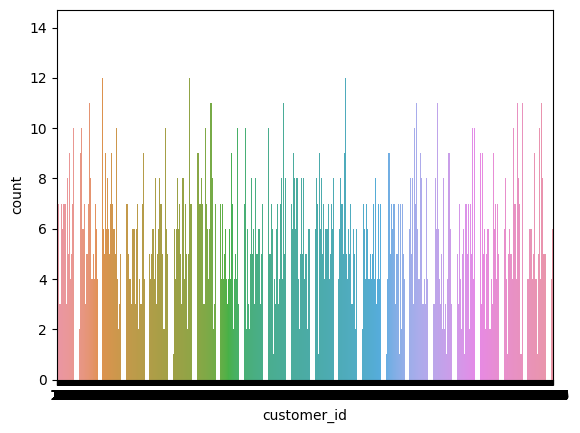

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(merged_df,x='customer_id')


In [19]:
df_customer_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64